<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
# Instalando nova versão do pycomp
import os
os.listdir('../../dist')

['pycomp-0.0.12.tar.gz',
 'pycomp-0.0.16.tar.gz',
 'pycomp-0.0.10.tar.gz',
 'pycomp-0.0.17.tar.gz',
 'pycomp-0.0.16-py3-none-any.whl',
 'pycomp-0.0.15-py3-none-any.whl',
 'pycomp-0.0.10-py3-none-any.whl',
 'pycomp-0.0.13-py3-none-any.whl',
 'pycomp-0.0.11.tar.gz',
 'pycomp-0.0.13.tar.gz',
 'pycomp-0.0.12-py3-none-any.whl',
 'pycomp-0.0.15.tar.gz',
 'pycomp-0.0.17-py3-none-any.whl',
 'pycomp-0.0.14-py3-none-any.whl',
 'pycomp-0.0.14.tar.gz',
 'pycomp-0.0.11-py3-none-any.whl']

In [12]:
!pip install "../../dist/pycomp-0.0.17-py3-none-any.whl"

Processing /home/paninit/workspaces/pycomp/dist/pycomp-0.0.17-py3-none-any.whl
  Attempting uninstall: pycomp
    Found existing installation: pycomp 0.0.16
    Uninstalling pycomp-0.0.16:
      Successfully uninstalled pycomp-0.0.16


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from pycomp.viz.formatador import *
import pandas as pd
import os
import numpy as np

In [23]:
from pycomp.viz.formatador import format_spines, AnnotateBars

In [24]:
# Definindo funções úteis para plotagem dos rótulos no gráfico
def make_autopct(values):
    """
    Função para configuração de rótulos em gráficos de rosca

    Parâmetros
    ----------
    :param values: valores atrelados ao rótulo [type: np.array]

    Retorno
    -------
    :return my_autopct: string formatada para plotagem dos rótulos
    """

    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))

        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)

    return my_autopct

In [25]:
"""
--------------------------------------------
---------- 2. PLOTAGENS GRÁFICAS -----------
--------------------------------------------
"""


# Função para plotagem de gráfico de rosca em relação a uma variávei específica do dataset
def donut_plot(df, col, ax, label_names=None, text='', colors=['crimson', 'navy'], circle_radius=0.8,
            title=f'Gráfico de Rosca', flag_ruido=0):
    """
    Etapas:
        1. definição de funções úteis para mostrar rótulos em valor absoluto e porcentagem
        2. criação de figura e círculo central de raio pré-definido
        3. plotagem do gráfico de pizza e adição do círculo central
        4. configuração final da plotagem
    Argumentos:
        df -- DataFrame alvo da análise [pandas.DataFrame]
        col -- coluna do DataFrame a ser analisada [string]
        label_names -- nomes customizados a serem plotados como labels [list]
        text -- texto central a ser posicionado [string / default: '']
        colors -- cores das entradas [list / default: ['crimson', 'navy']]
        figsize -- dimensões da plotagem [tupla / default: (8, 8)]
        circle_radius -- raio do círculo central [float / default: 0.8]
    Retorno:
        None
    """

    # Retorno dos valores e definição da figura
    values = df[col].value_counts().values
    if label_names is None:
        label_names = df[col].value_counts().index

    # Verificando parâmetro de supressão de alguma categoria da análise
    if flag_ruido > 0:
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]

    # Plotando gráfico de rosca
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    # Configurando argumentos do texto central
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=14, color='dimgrey')


# Função para análise da matriz de correlação
def target_correlation_matrix(data, label_name, ax, n_vars=10, corr='positive', fmt='.2f', cmap='YlGnBu',
                              cbar=True, annot=True, square=True):
    """
    Etapas:
        1. construção de correlação entre as variáveis
        2. filtragem das top k variáveis com maior correlação
        3. plotagem e configuração da matriz de correlação
    Argumentos:
        data -- DataFrame a ser analisado [pandas.DataFrame]
        label_name -- nome da coluna contendo a variável resposta [string]
        n_vars -- indicador das top k variáveis a serem analisadas [int]
        corr -- indicador booleano para plotagem de correlações ('positive', 'negative') [string]
        fmt -- formato dos números de correlação na plotagem [string]
        cmap -- color mapping [string]
        figsize -- dimensões da plotagem gráfica [tupla]
        cbar -- indicador de plotagem da barra indicadora lateral [bool]
        annot -- indicador de anotação dos números de correlação na matriz [bool]
        square -- indicador para redimensionamento quadrático da matriz [bool]
    Retorno:
        None
    """

    # Criando matriz de correlação para a base de dados
    corr_mx = data.corr()

    # Retornando apenas as top k variáveis com maior correlação frente a variável resposta
    if corr == 'positive':
        corr_cols = list(corr_mx.nlargest(n_vars+1, label_name)[label_name].index)
        title = f'Top {n_vars} Features - Correlação Positiva com o Target'
    elif corr == 'negative':
        corr_cols = list(corr_mx.nsmallest(n_vars+1, label_name)[label_name].index)
        corr_cols = [label_name] + corr_cols[:-1]
        title = f'Top {n_vars} Features - Correlação Negativa com o Target'
        cmap = 'magma'

    corr_data = np.corrcoef(data[corr_cols].values.T)

    # Construindo plotagem da matriz
    sns.heatmap(corr_data, ax=ax, cbar=cbar, annot=annot, square=square, fmt=fmt, cmap=cmap,
                yticklabels=corr_cols, xticklabels=corr_cols)
    ax.set_title(title, size=14, color='dimgrey', pad=20)

    return


# Distplot para comparação de densidade das features baseadas na variável target
def distplot(df, features, fig_cols, hue=False, color=['crimson', 'darkslateblue'], hist=False, figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de boxplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes
    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string -- default: False]
        color_list -- cores para cada classe nos gráficos [list - default: ['crimson', 'darkslateblue']]
        hist -- indicador de plotagem das faixas do histograma [bool - default: False]
        figsize -- dimensões da plotagem [tupla - default: (16, 12)]
    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_cols = fig_cols
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Percorrendo por cada uma das features
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        target_idx = 0

        # Plotando, para cada eixo, um gráfico por classe target
        if hue != False:
            for classe in df[hue].value_counts().index:
                df_hue = df[df[hue] == classe]
                sns.distplot(df_hue[col], color=color[target_idx], hist=hist, ax=ax, label=classe)
                target_idx += 1
        else:
            sns.distplot(df[col], color=color, hist=hist, ax=ax)

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

        # Customizando plotagem
        ax.set_title(f'Feature: {col}', color='dimgrey', size=14)
        plt.setp(ax, yticks=[])
        sns.set(style='white')
        sns.despine(left=True)

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Finalizando customização
    plt.tight_layout()
    plt.show()


# Função para plotagem de stripplot
def stripplot(df, features, fig_cols, hue=False, palette='viridis', figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de stripplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes
    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string - default: False]
        palette -- paleta de cores [string / lista - default: 'viridis']
        figsize -- dimensões da figura de plotagem [tupla - default: (16, 12)]
    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_cols = fig_cols
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Plotando gráfico
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Plotando gráfico atribuindo a variável target como hue
        if hue != False:
            sns.stripplot(x=df[hue], y=df[col], ax=ax, palette=palette)
        else:
            sns.stripplot(y=df[col], ax=ax, palette=palette)

        # Formatando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(f'Feature: {col.upper()}', size=14, color='dimgrey')
        plt.tight_layout()

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1


def boxenplot(df, features, fig_cols, hue=False, palette='viridis', figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de boxplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes
    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string - default: False]
        palette -- paleta de cores [string / lista - default: 'viridis']
        figsize -- dimensões da figura de plotagem [tupla - default: (16, 12)]
    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Plotando gráfico
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Plotando gráfico atribuindo a variável target como hue
        if hue != False:
            sns.boxenplot(x=df[hue], y=df[col], ax=ax, palette=palette)
        else:
            sns.boxenplot(y=df[col], ax=ax, palette=palette)

        # Formatando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(f'Feature: {col.upper()}', size=14, color='dimgrey')
        plt.tight_layout()

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1


# Função responsável por plotar volumetria de uma variável categórica (quebra por hue é opcional)
def countplot(df, feature, order=True, hue=False, label_names=None, palette='plasma', colors=['darkgray', 'navy'],
              figsize=(12, 5), loc_legend='lower left', width=0.75, sub_width=0.3, sub_size=12):
    """
    Etapas:
        1. customização da plotagem de acordo com a presença (ou não) do parâmetro hue
        2. definição das figuras e plotagem dos gráficos adequados
        3. customização da plotagem
    Argumentos:
        df -- DataFrame alvo da análise [pandas.DataFrame]
        feature -- coluna a ser analisada [string]
        order -- flag booleano pra indicar a ordenação da plotagem [bool - default: True]
        hue -- parâmetro de quebra de análise [string - default: False]
        label_names -- descrição dos labels a serem colocados na legenda [list - default: None]
        palette -- paleta de cores a ser utilizada no plot singular da variável [string - default: 'viridis']
        colors -- cores a serem utilizadas no plot quebrado por hue [list - default: ['darkgray', 'navy']]
        figsize -- dimensões da plotagem [tupla - default: (15, 5)]
        loc_legend -- posição da legenda em caso de plotagem por hue [string - default: 'best']
        width -- largura das barras em caso de plotagem por hue [float - default: 0.5]
        sub_width -- parâmetro de alinhamento dos rótulos em caso de plotagem por hue [float - default: 0.3]
    Retorno:
        None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if hue != False:
        # Redifinindo dimensões e plotando gráfico solo + versus variável categórica
        figsize = (figsize[0], figsize[1] * 2)
        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize)
        if order:
            sns.countplot(x=feature, data=df, palette=palette, ax=axs[0], order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette=palette, ax=axs[0])

        # Plotando gráfico de análise por hue (stacked bar chart)
        feature_rate = pd.crosstab(df[feature], df[hue])
        percent_df = feature_rate.div(feature_rate.sum(1).astype(float), axis=0)
        if order:
            sort_cols = list(df[feature].value_counts().index)
            sorter_index = dict(zip(sort_cols, range(len(sort_cols))))
            percent_df['rank'] = percent_df.index.map(sorter_index)
            percent_df = percent_df.sort_values(by='rank')
            percent_df = percent_df.drop('rank', axis=1)
            percent_df.plot(kind='bar', stacked=True, ax=axs[1], color=colors, width=width)
        else:
            percent_df.plot(kind='bar', stacked=True, ax=axs[1], color=colors, width=width)
        # sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=axs[1], order=df[feature].value_counts().index)

        # Inserindo rótulo de percentual para gráfico singular
        for p in axs[0].patches:
            # Coletando parâmetros e inserindo no gráfico
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            axs[0].annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha='center', va='bottom',
                            size=sub_size)

        # Inserindo rótulo de percentual para gráfico hue
        for p in axs[1].patches:
            # Coletando parâmetros
            height = p.get_height()
            width = p.get_width()
            x = p.get_x()
            y = p.get_y()

            # Formatando parâmetros coletados e inserindo no gráfico
            label_text = f'{round(100 * height, 1)}%'
            label_x = x + width - sub_width
            label_y = y + height / 2
            axs[1].text(label_x, label_y, label_text, ha='center', va='center', color='white', fontweight='bold',
                        size=sub_size)

        # Definindo títulos
        axs[0].set_title(f'Análise de Volumetria da Variável {feature}', size=14, color='dimgrey', pad=20)
        axs[0].set_ylabel('Volumetria')
        axs[1].set_title(f'Análise de Volumetria da Variável {feature} por {hue}', size=14, color='dimgrey', pad=20)
        axs[1].set_ylabel('Percentual')

        # Formatando eixo de cada uma das plotagens
        for ax in axs:
            format_spines(ax, right_border=False)

        # Definindo legenda para hue
        plt.legend(loc=loc_legend, title=f'{hue}', labels=label_names)

    else:
        # Plotagem única: sem quebra por variável hue
        fig, ax = plt.subplots(figsize=figsize)
        if order:
            sns.countplot(x=feature, data=df, palette=palette, ax=ax, order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette=palette, ax=ax)

            # Formatando eixos
        ax.set_ylabel('Volumetria')
        format_spines(ax, right_border=False)

        # Inserindo rótulo de percentual
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha='center', va='bottom')

        # Definindo título
        ax.set_title(f'Análise de Volumetria da Variável {feature}', size=14, color='dimgrey')

    # Configurações finais
    plt.tight_layout()
    plt.show()

# Função responsável por plotar volumetria de uma única variável categórica em formato atualizado
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]
    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # Verificando a plotagem de top categorias
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # Validando demais argumentos e plotando gráfico
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # Formatando eixos
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')


# Função para plotagem de volumetria das variáveis categóricas do conjunto de dados
def catplot_analysis(df_categorical, fig_cols=3, hue=False, palette='viridis', figsize=(16, 10)):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação
    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]
    Retorno:
        None
    """

    # Retornando parâmetros para organização da figura
    if hue != False:
        cat_features = list(df_categorical.drop(hue, axis=1).columns)
    else:
        cat_features = list(df_categorical.columns)

    total_cols = len(cat_features)
    fig_cols = fig_cols
    fig_rows = ceil(total_cols / fig_cols)
    ncount = len(cat_features)

    # Retornando parâmetros para organização da figura
    sns.set(style='white', palette='muted', color_codes=True)
    total_cols = len(cat_features)
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(figsize))
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    for col in cat_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        if hue != False:
            sns.countplot(y=col, data=df_categorical, palette=palette, ax=ax, hue=hue,
                          order=df_categorical[col].value_counts().index)
        else:
            sns.countplot(y=col, data=df_categorical, palette=palette, ax=ax,
                          order=df_categorical[col].value_counts().index)

        # Customizando gráfico
        format_spines(ax, right_border=False)
        AnnotateBars(n_dec=0, color='dimgrey').horizontal(ax)
        ax.set_title(col)

        # Incrementando índices de eixo
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(cat_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.tight_layout()
    plt.show()


# Função para plotagem de volumetria das variáveis categóricas do conjunto de dados
def numplot_analysis(df_numerical, fig_cols=3, color_sequence=['darkslateblue', 'mediumseagreen', 'darkslateblue'],
                     hue=False, color_hue=['darkslateblue', 'crimson'], hist=False):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação
    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]
    Retorno:
        None
    """

    # Configurando sets do seaborn
    sns.set(style='white', palette='muted', color_codes=True)

    # Criando um DataFrame de variáveis categóricas
    #num_features = [col for col, dtype in df.dtypes.items() if dtype != 'object']
    #df_numerical = df.loc[:, num_features]

    # Retornando parâmetros para organização da figura
    if hue != False:
        num_features = list(df_numerical.drop(hue, axis=1).columns)
    else:
        num_features = list(df_numerical.columns)

    total_cols = len(num_features)
    fig_cols = fig_cols
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(fig_cols * 5, fig_rows * 4.5))
    sns.despine(left=True)
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    color_idx = 0
    for col in num_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        target_idx = 0

        if hue != False:
            for classe in df_numerical[hue].value_counts().index:
                df_hue = df_numerical[df_numerical[hue] == classe]
                sns.distplot(df_hue[col], color=color_hue[target_idx], hist=hist, ax=ax, label=classe)
                target_idx += 1
                ax.set_title(col)
        else:
            sns.distplot(df_numerical[col], color=color_sequence[color_idx], hist=hist, ax=ax)
            ax.set_title(col, color=color_sequence[color_idx])

        # Customizando gráfico
        format_spines(ax, right_border=False)

        # Incrementando índices de eixo
        color_idx += 1
        j += 1
        if j == fig_cols:
            j = 0
            i += 1
            color_idx = 0

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(num_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.setp(axs, yticks=[])
    plt.tight_layout()
    plt.show()


# Função para plotagem de representatividade de cada categoria quanto a um hue específico
def catplot_percentage_analysis(df_categorical, hue, fig_cols=2, palette='viridis', figsize=(16, 10)):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação
    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]
    Retorno:
        None
    """
 
    # Retornando parâmetros para organização da figura
    sns.set(style='white', palette='muted', color_codes=True)
    cat_features = list(df_categorical.drop(hue, axis=1).columns)
    total_cols = len(cat_features)
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(figsize))
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    for col in cat_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Aplicando crosstab para análise de representatividade da categoria
        col_to_hue = pd.crosstab(df_categorical[col], df_categorical[hue])
        col_to_hue.div(col_to_hue.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax,
                                                                     colors=palette)

        # Customizando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(col)
        ax.set_ylabel('')

        # Incrementando índices de eixo
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(cat_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.tight_layout()
    plt.show()


def mean_sum_analysis(df, group_col, value_col, orient='vertical', palette='plasma', figsize=(15, 6)):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]
    Retorno
    -------
    None
    """

    # Grouping data
    df_mean = df.groupby(group_col, as_index=False).mean()
    df_sum = df.groupby(group_col, as_index=False).sum()

    # Sorting grouped dataframes
    df_mean.sort_values(by=value_col, ascending=False, inplace=True)
    sorter = list(df_mean[group_col].values)
    sorter_idx = dict(zip(sorter, range(len(sorter))))
    df_sum['mean_rank'] = df_mean[group_col].map(sorter_idx)
    df_sum.sort_values(by='mean_rank', inplace=True)
    df_sum.drop('mean_rank', axis=1, inplace=True)

    # Plotting data
    fig, axs = plt.subplots(ncols=2, figsize=figsize)
    if orient == 'vertical':
        sns.barplot(x=value_col, y=group_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=value_col, y=group_col, data=df_sum, ax=axs[1], palette=palette)
        AnnotateBars(n_dec=0, font_size=12, color='black').horizontal(axs[0])
        AnnotateBars(n_dec=0, font_size=12, color='black').horizontal(axs[1])
    elif orient == 'horizontal':
        sns.barplot(x=group_col, y=value_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=group_col, y=value_col, data=df_sum, ax=axs[1], palette=palette)
        AnnotateBars(n_dec=0, font_size=12, color='black').vertical(axs[0])
        AnnotateBars(n_dec=0, font_size=12, color='black').vertical(axs[1])

    # Customizing plot
    for ax in axs:
        format_spines(ax, right_border=False)
        ax.set_ylabel('')
    axs[0].set_title(f'Mean of {value_col} by {group_col}', size=14, color='dimgrey')
    axs[1].set_title(f'Sum of {value_col} by {group_col}', size=14, color='dimgrey')

    plt.tight_layout()
    plt.show()


def answear_plot(grouped_data, grouped_col, list_cols, axs, top=5, bottom_filter=True, palette='plasma'):
    """
    Parâmetros
    ----------
    grouped_data: pandas DataFrame com os dados já agrupados para análise [pd.DataFrame]
    grouped_col: referência da coluna pivot utilizada no agrupamento [string]
    list_cols: lista de colunas a serem utilizadas na análise [list]
    axs: eixos a serem utilizados na plotagem [matplotlib.axis]
    top: quantidade de entradas nas análises head and tail [int, default: 5]
    bottom_filter: flag para filtragem de elementos com pelo menos 1 ocorrência no bot [bool, default: True]
    palette: paleta de cores utilizada na plotagem [string, default: 'plasma']
    Retorno
    -------
    None
    """

    # Extracting plot dims and looking at number of cols
    nrows = axs.shape[0]
    ncols = axs.shape[1]
    if len(list_cols) != ncols:
        print(f'Number of cols passed in list_cols arg is different for figure cols axis. Please check it.')
        return None

    # Iterating over columns in the list and creating charts
    i, j = 0, 0
    for col in list_cols:
        ax0 = axs[-3, j]
        ax1 = axs[-2, j]
        ax2 = axs[-1, j]
        sorted_data = grouped_data.sort_values(by=col, ascending=False)

        # First Line: Top entries
        sns.barplot(x=col, y=grouped_col, data=sorted_data.head(top), ax=ax1, palette=palette)
        ax1.set_title(f'Top {top} {grouped_col.capitalize()} with Highest \n{col.capitalize()}')

        # Second Line: Bottom entries
        if bottom_filter:
            sns.barplot(x=col, y=grouped_col, data=sorted_data[sorted_data[col] > 0].tail(top), ax=ax2,
                        palette=palette+'_r')
        else:
            sns.barplot(x=col, y=grouped_col, data=sorted_data.tail(top), ax=ax2, palette=palette+'_r')
        ax2.set_title(f'Top {top} {grouped_col.capitalize()} with Lowest \n{col.capitalize()}')

        # Customizing charts
        for ax in ax1, ax2:
            ax.set_xlim(0, grouped_data[col].max())
            ax.set_ylabel('')
            format_spines(ax, right_border=False)

        # Annotations
        mean_ind = grouped_data[col].mean()
        ax0.text(0.50, 0.30, round(mean_ind, 2), fontsize=45, ha='center')
        ax0.text(0.50, 0.12, f'is the average of {col}', fontsize=12, ha='center')
        ax0.text(0.50, 0.00, f'by {grouped_col}', fontsize=12, ha='center')
        ax0.axis('off')

        j += 1

"""
--------------------------------------------
-------- 3. ANÁLISES EM DATAFRAMES ---------
--------------------------------------------
"""


def data_overview(df, corr=False, label_name=None, sort_by='qtd_null', thresh_percent_null=0, thresh_corr_label=0):
    """
    Etapas:
        1. levantamento de atributos com dados nulos no conjunto
        2. análise do tipo primitivo de cada atributo
        3. análise da quantidade de entradas em caso de atributos categóricos
        4. extração da correlação pearson com o target para cada atributo
        5. aplicação de regras definidas nos argumentos
        6. retorno do dataset de overview criado
    Argumentos:
        df -- DataFrame a ser analisado [pandas.DataFrame]
        label_name -- nome da variável target [string]
        sort_by -- coluna de ordenação do dataset de overview [string - default: 'qtd_null']
        thresh_percent_null -- filtro de dados nulos [int - default: 0]
        threh_corr_label -- filtro de correlação com o target [int - default: 0]
    Retorno
        df_overview -- dataet consolidado contendo análise das colunas [pandas.DataFrame]
    """

    # Criando DataFrame com informações de dados nulos
    df_null = pd.DataFrame(df.isnull().sum()).reset_index()
    df_null.columns = ['feature', 'qtd_null']
    df_null['percent_null'] = df_null['qtd_null'] / len(df)

    # Retornando tipo primitivo e qtd de entradas para os categóricos
    df_null['dtype'] = df_null['feature'].apply(lambda x: df[x].dtype)
    df_null['qtd_cat'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in
                          df_null['feature'].values]

    if corr:
        # Extraindo informação de correlação com o target
        label_corr = pd.DataFrame(df.corr()[label_name])
        label_corr = label_corr.reset_index()
        label_corr.columns = ['feature', 'target_pearson_corr']

        # Unindo informações
        df_null_overview = df_null.merge(label_corr, how='left', on='feature')
        df_null_overview.query('target_pearson_corr > @thresh_corr_label')
    else:
        df_null_overview = df_null

    # Filtrando dados nulos de acordo com limiares
    df_null_overview.query('percent_null > @thresh_percent_null')

    # Ordenando DataFrame
    df_null_overview = df_null_overview.sort_values(by=sort_by, ascending=False)
    df_null_overview = df_null_overview.reset_index(drop=True)

    return df_null_overview


In [26]:
# Definindo variáveis do projeto
DATA_PATH = 'titanic_data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Lendo base de treino e verificando conteúdo
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões da base de treino: {df.shape}')
df.head()

Dimensões da base de treino: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def donut_

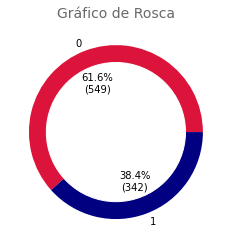

In [27]:
fig, ax = plt.subplots()
donut_plot(df=df, col='Survived', ax=ax)

TODO

- Modificar formato de plotagens gráficas dentro das funções (criar figura dentro da função)
- Modificar argumentos e trazer \*\*kwargs pra auxiliar na configuração das plotagens (figsize, color, etc)
- Modificar docstrings das funções
- Adicionar a nomenclatura "plot_" na frente das funções
- Pensar em criar uma função utilizando GridSpec com uma análise geral de determinada variável (texto com desvio padrão, etc)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
label_names = ['Good', 'Bad']
color_list = ['navy', 'mediumvioletred']
text = f'Total\n{len(df_ori)}'
title = 'Target Class Balance'

# Visualizing it through a donut chart
donut_plot(df, col='risk', ax=ax, label_names=label_names, colors=color_list, title=title, text=text)